# Fellows Project: Sports Political Donations

## Andrew Nguyen

The data contains information following the story from https://fivethirtyeight.com/features/inside-the-political-donation-history-of-wealthy-sports-owners/

The dataset contains every confirmed partisan political contribution from team owners and commissioners in the NFL, NBA, WNBA, NHL, MLB and NASCAR. Only contributions while owners were involved with the team are included. The data is from the Federal Election Commission and OpenSecrets and can be found here: https://github.com/fivethirtyeight/data/tree/master/sports-political-donations

In [3]:
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)


sports_don = Table.read_table('sports-political-donations.csv')
sports_don

Owner,Team,League,Recipient,Amount,Election Year,Party
Adam Silver,Commissioner,NBA,WRIGHT 2016,"$4,000",2016,Democrat
Adam Silver,Commissioner,NBA,BIDEN FOR PRESIDENT,"$2,800",2020,Democrat
Adam Silver,Commissioner,NBA,CORY 2020,"$2,700",2020,Democrat
Adam Silver,Commissioner,NBA,Kamala Harris for the People,"$2,700",2020,Democrat
Adam Silver,Commissioner,NBA,Win The Era PAC,"$2,700",2020,Democrat
Adam Silver,Commissioner,NBA,KOHL FOR CONGRESS,"$2,000",2018,Democrat
Adam Silver,Commissioner,NBA,BETO FOR TEXAS,"$1,000",2018,Democrat
Adam Silver,Commissioner,NBA,MONTANANS FOR TESTER,"$1,000",2018,Democrat
Adam Silver,Commissioner,NBA,SERVE AMERICA PAC,"$1,000",2018,Democrat
Adam Silver,Commissioner,NBA,ADAM SCHLEIFER FOR CONGRESS,"$1,000",2020,Democrat


Group the political parties to get the count data so we can visualize it. 

In [4]:
#Use the group() function
sports_don.group('Party')

Party,count
Bipartisan,195
"Bipartisan, but mostly Democratic",5
"Bipartisan, but mostly Republican",40
Democrat,921
Independent,3
Republican,1625
nan,9


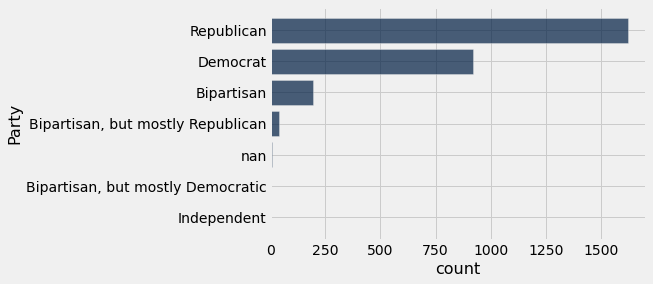

In [5]:

party_distr = sports_don.group('Party')
party_distr.sort('count', descending = True).barh('Party')

As we can see from both the table and bar plot, the Republican party -- in terms of sheer number of donors -- has the most donations from wealthy sports donors. We also want to know the amount of money that was donated, not just the number of donations.  

To do so, let's convert 'Amount' from categorical to numeric data. 


Define a function that will take an input string 
Use replace function to remove $ and , . Then convert to numeric with float
Give your function to apply to work on the values in the column that you are applying your function to

In [47]:
#Define a function str_replace():
def str_replace(string):
    return float(string.replace('$', '').replace(',' , ''))

#Store the converted string into a new variable, Dollar_Amt
Dollar_Amt = sports_don.apply(str_replace, 'Amount')
Dollar_Amt

array([4000., 2800., 2700., ..., 2700., 2700., 2700.])

In [55]:
#Add the new array to the table using with_column() and store it in a new variable
updated_table = sports_don.with_column("Amount", Dollar_Amt)
updated_table

Owner,Team,League,Recipient,Amount,Election Year,Party
Adam Silver,Commissioner,NBA,WRIGHT 2016,4000,2016,Democrat
Adam Silver,Commissioner,NBA,BIDEN FOR PRESIDENT,2800,2020,Democrat
Adam Silver,Commissioner,NBA,CORY 2020,2700,2020,Democrat
Adam Silver,Commissioner,NBA,Kamala Harris for the People,2700,2020,Democrat
Adam Silver,Commissioner,NBA,Win The Era PAC,2700,2020,Democrat
Adam Silver,Commissioner,NBA,KOHL FOR CONGRESS,2000,2018,Democrat
Adam Silver,Commissioner,NBA,BETO FOR TEXAS,1000,2018,Democrat
Adam Silver,Commissioner,NBA,MONTANANS FOR TESTER,1000,2018,Democrat
Adam Silver,Commissioner,NBA,SERVE AMERICA PAC,1000,2018,Democrat
Adam Silver,Commissioner,NBA,ADAM SCHLEIFER FOR CONGRESS,1000,2020,Democrat


Now let's see who donated the most overall. Group the owners and amount sums and plot a horizontal barplot in descending order to see the top donors throughout all the election years. 

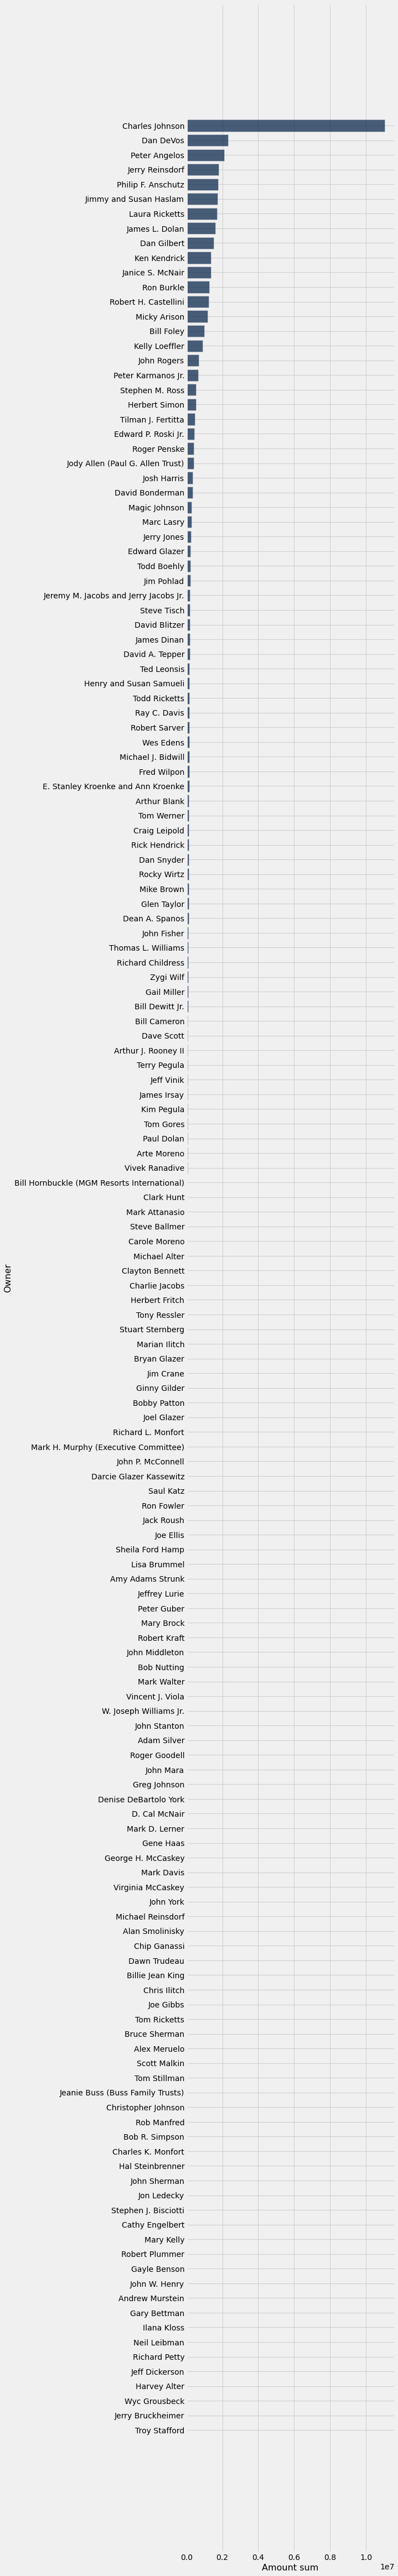

In [85]:
#Use select() and group() with the collect arg. Note the renaming of Amount because of the collect arg.
owner_sums = updated_table.select(['Amount', 'Owner']).group('Owner', collect=sum)
owner_sums.sort('Amount sum', descending = True).barh('Owner')

Now do the same thing but sort by league. Some owners donated to multiple leagues (i.e. NBA, MLB); the ones that did will also have their own row in the horizontal barplot. 

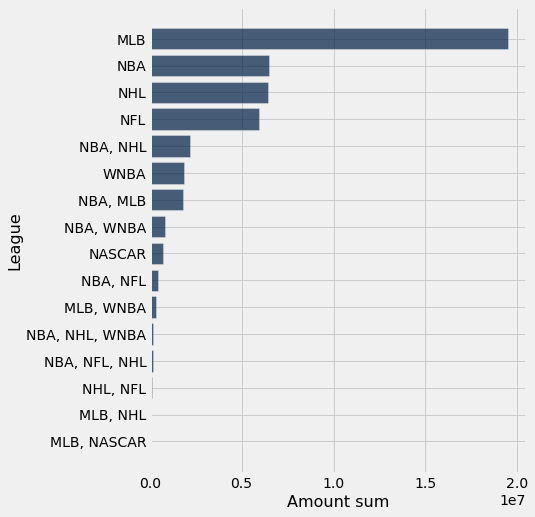

In [86]:
league_sums = updated_table.select(['Amount', 'League']).group('League', collect=sum)
league_sums.sort('Amount sum', descending = True).barh('League')

We can also use the seaborn library to visualize our data. However, seaborn only accepts numpy arrays or dataframes. Let's store our data into a Pandas dataframe. 

In [123]:
import pandas as pd
data = pd.read_csv('sports-political-donations.csv')
df = pd.DataFrame(data)

Now we want to convert Amount to numeric, again. This time use RegEx (Regular Expressions) to search for the $ string and replace it with a blank ''. RegEx can be used to check if a string contains the specified search pattern.


Python has a built-in package called re, which can be used to work with Regular Expressions.

Import the re module:

In [132]:
import re
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)

updated_df = df.assign(Amount=df['Amount'])
updated_df

,Owner,Team,League,Recipient,Amount,Election Year,Party
0,Adam Silver,Commissioner,NBA,WRIGHT 2016,4000.0,2016,Democrat
1,Adam Silver,Commissioner,NBA,BIDEN FOR PRESIDENT,2800.0,2020,Democrat
2,Adam Silver,Commissioner,NBA,CORY 2020,2700.0,2020,Democrat
3,Adam Silver,Commissioner,NBA,Kamala Harris for the People,2700.0,2020,Democrat
4,Adam Silver,Commissioner,NBA,Win The Era PAC,2700.0,2020,Democrat
...,...,...,...,...,...,...,...
2793,Zygi Wilf,Minnesota Vikings,NFL,ANGIE CRAIG FOR CONGRESS,2700.0,2018,Democrat
2794,Zygi Wilf,Minnesota Vikings,NFL,DEAN PHILLIPS FOR CONGRESS,2700.0,2018,Democrat
2795,Zygi Wilf,Minnesota Vikings,NFL,MENENDEZ FOR SENATE,2700.0,2018,Democrat
2796,Zygi Wilf,Minnesota Vikings,NFL,TINA SMITH FOR MINNESOTA,2700.0,2018,Democrat


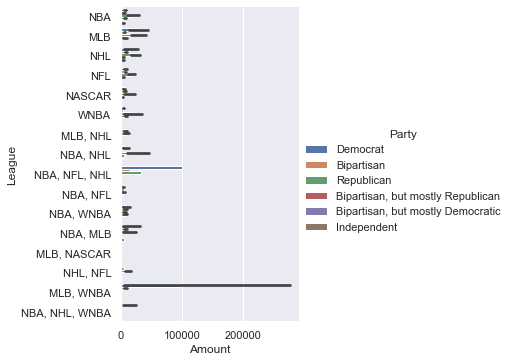

In [138]:
import seaborn as sns
sns.set_theme()

sns.catplot(data=updated_df, kind="bar", x="Amount", y="League", hue="Party")

Questions to consider: 
1)Which league donates the most overall
2)Which team owners donated the most?
3)How did different leagues differ in the party they donated to